Goal: Create a movie recommendation system using "Item based collaborative filtering".

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
movie_titles_df = pd.read_csv("Movie_Id_Titles")

In [149]:
movie_titles_df.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [150]:
movie_ratings_df = pd.read_csv("u.data",sep= "\t", names=["user_id","item_id","rating","timestamp"])

In [151]:
movie_ratings_df

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
5,22,377,1,878887116
6,244,51,2,880606923
7,166,346,1,886397596
8,298,474,4,884182806
9,115,265,2,881171488


In [152]:
movie_ratings_df.rating.value_counts()

4    34174
3    27145
5    21203
2    11370
1     6111
Name: rating, dtype: int64

In [153]:
len(movies_rating_df.user_id.unique())

944

In [154]:
movie_ratings_df = movie_ratings_df.drop(["timestamp"], axis=1)

In [155]:
movie_ratings_df.describe()

,user_id,item_id,rating
count,100003.000000,100003.000000,100003.000000
mean,462.470876,425.520914,3.529864
std,266.622454,330.797791,1.125704
min,0.000000,1.000000,1.000000
25%,254.000000,175.000000,3.000000
50%,447.000000,322.000000,4.000000
75%,682.000000,631.000000,4.000000
max,943.000000,1682.000000,5.000000


In [156]:
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 3 columns):
user_id    100003 non-null int64
item_id    100003 non-null int64
rating     100003 non-null int64
dtypes: int64(3)
memory usage: 2.3 MB


MERGING DATAFRAMES

In [157]:
movies_df = pd.merge(movie_titles_df, movie_ratings_df, how='inner', on='item_id')
movies_df.head()

,item_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [158]:
movies_rating_mean = movies_df.groupby("title")["rating"].describe()['mean']  #Grouping by movie to get mean rating per movie

In [159]:
movies_rating_count = movies_df.groupby("title")["rating"].describe()["count"]  #Grouping by movie to get mean count per movie

In [160]:
movies_data = pd.concat([movies_rating_mean,movies_rating_count], axis=1)
movies_data

,mean,count
title,,
'Til There Was You (1997),2.333333,9.0
1-900 (1994),2.600000,5.0
101 Dalmatians (1996),2.908257,109.0
12 Angry Men (1957),4.344000,125.0
187 (1997),3.024390,41.0
2 Days in the Valley (1996),3.225806,93.0
"20,000 Leagues Under the Sea (1954)",3.500000,72.0
2001: A Space Odyssey (1968),3.969112,259.0
3 Ninjas: High Noon At Mega Mountain (1998),1.000000,5.0


DISTRIBUTION OF MEAN RATINGS 

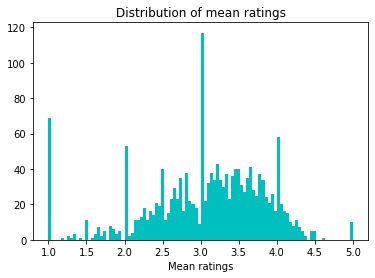

In [183]:
plt.hist(movies_data["mean"], bins=100, color='c')
plt.title("Distribution of mean ratings")
plt.xlabel("Mean ratings")
plt.ylabel("Count")
plt.show()

Most of the movies have a mean rating of 3.

NUMBER OF RATINGS

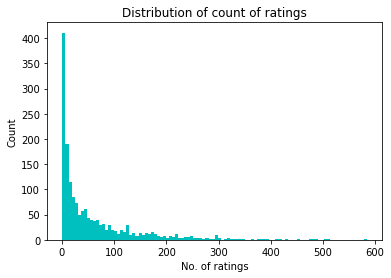

In [186]:
plt.hist(movies_data["count"], bins=100, color='c')
plt.title("Distribution of count of ratings")
plt.xlabel("No. of ratings")
plt.ylabel("Count")
plt.show()

Number of reviews for most of the movies are single digit numbers. Highest rated movie having nearly 600 reviews.

In [163]:
movies_data.sort_values("count", ascending=False).reset_index().head()

,title,mean,count
0,Star Wars (1977),4.359589,584.0
1,Contact (1997),3.803536,509.0
2,Fargo (1996),4.155512,508.0
3,Return of the Jedi (1983),4.007890,507.0
4,Liar Liar (1997),3.156701,485.0


CREATING A PIVOT TABLE WHICH INDICATES USERS VS. MOVIES

In [164]:
user_movie_matrix = movies_df.pivot_table(index="user_id", columns="title", values="rating")

In [165]:
user_movie_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


CORRELATIONS OF MOVIES WITH SINGLE MOVIE(TITANIC)

In [170]:
titanic = user_movie_matrix["Titanic (1997)"]
titanic

user_id
0      NaN
1      NaN
2      5.0
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     4.0
14     2.0
15     NaN
16     NaN
17     NaN
18     NaN
19     2.0
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     5.0
27     NaN
28     NaN
29     NaN
      ... 
914    3.0
915    4.0
916    NaN
917    NaN
918    NaN
919    5.0
920    5.0
921    5.0
922    NaN
923    NaN
924    4.0
925    NaN
926    3.0
927    NaN
928    NaN
929    NaN
930    NaN
931    4.0
932    NaN
933    NaN
934    3.0
935    5.0
936    4.0
937    NaN
938    5.0
939    NaN
940    5.0
941    NaN
942    3.0
943    NaN
Name: Titanic (1997), Length: 944, dtype: float64

In [171]:
titanic_correlations= pd.DataFrame(user_movie_matrix.corrwith(titanic), columns=["correlation"])

In [172]:
titanic_correlations = pd.concat([titanic_correlations,movies_data["count"]], axis=1)
titanic_correlations.head()

,correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
1-900 (1994),NaN,5.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0


In [173]:
titanic_correlations.dropna(inplace=True)
titanic_correlations.head()

,correlation,count
title,,
'Til There Was You (1997),-0.062017,9.0
101 Dalmatians (1996),0.120113,109.0
12 Angry Men (1957),0.077700,125.0
187 (1997),0.315654,41.0
2 Days in the Valley (1996),0.017295,93.0


In [176]:
titanic_correlations.sort_values("correlation", ascending=False)

,correlation,count
title,,
Nadja (1994),1.0,8.0
"Pest, The (1997)",1.0,8.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
For Ever Mozart (1996),1.0,3.0
"Jerky Boys, The (1994)",1.0,3.0
"Newton Boys, The (1998)",1.0,4.0
Hearts and Minds (1996),1.0,5.0
"Simple Wish, A (1997)",1.0,3.0
Purple Noon (1960),1.0,7.0


MOVIES HAVING TOTAL NUMBER OF RATINGS GREATER THAN 80 ARE ONLY CONSIDERED HERE FOR CORRELATION/RECOMMENDATION

RECOMMENDING TOP 10 CORRELATIONS

In [177]:
titanic_correlations[titanic_correlations["count"]>80].sort_values("correlation", ascending=False).head(10)

,correlation,count
title,,
Titanic (1997),1.000000,350.0
"River Wild, The (1994)",0.497600,146.0
"Abyss, The (1989)",0.472103,151.0
Bram Stoker's Dracula (1992),0.443560,120.0
True Lies (1994),0.435104,208.0
William Shakespeare's Romeo and Juliet (1996),0.430243,106.0
"Last of the Mohicans, The (1992)",0.427239,128.0
Outbreak (1995),0.426237,104.0
Demolition Man (1993),0.411489,92.0


CORRELATION OF MOVIES WITH ONE ANOTHER

In [178]:
movie_correlations = user_movie_matrix.corr(method='pearson', min_periods=80)

In [179]:
movie_correlations

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.000000,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2 Days in the Valley (1996),NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"20,000 Leagues Under the Sea (1954)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001: A Space Odyssey (1968),NaN,NaN,NaN,0.178848,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,NaN,NaN,-0.001307,NaN,NaN,NaN,NaN,NaN,NaN
3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


RECOMMENDATIONS BASED ON USER INPUT(my_ratings)

In [180]:
my_ratings = pd.read_csv("My_Ratings.csv")
my_ratings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


CREATING A SERIES OF TOP 10 RECOMMENDED MOVIES WITH HIGHEST CORRELATION BASED ON USER INPUT(MOVIE NAME AND RATING)

In [181]:
similar_movies_list = pd.Series()
for i in range(0,my_ratings.shape[0]):
    similar_movie = movie_correlations[my_ratings["Movie Name"][i]].dropna()
    similar_movie = similar_movie.map(lambda x: x*my_ratings["Ratings"][i])
    similar_movies_list= similar_movies_list.append(similar_movie)

In [182]:
similar_movies_list.sort_values(inplace=True, ascending=False)
print(similar_movies_list.head(10))

Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
Top Gun (1986)                               2.028602
G.I. Jane (1997)                             1.989656
Multiplicity (1996)                          1.984302
Grumpier Old Men (1995)                      1.953494
Ghost and the Darkness, The (1996)           1.895376
dtype: float64


Conclusion: We created and deployed a simple recommendation system for recommending top 10 movies based on user's rating history.